## 导入绘图类与numpy,然后自定义一批数据进行试验

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(111)
#自定义两列特征
X = np.random.normal(0, 1, size=(200, 2))
#绘制一个抛物线作为决策边界，然后分离出两类
Y = np.array(X[:,0]**2 + X[:,1] < 1.5, dtype='int')
#增加噪音
for _ in range(20):
   Y[np.random.randint(200)] = 1

## 生成图表，可视化观察

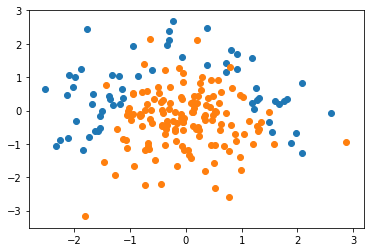

In [2]:
#绘制第一类中，X每一列的特征
plt.scatter(X[Y==0,0], X[Y==0, 1])
#绘制第二类中，X每一列的特征
plt.scatter(X[Y==1,0], X[Y==1, 1])
plt.show()

## 进行数据分割

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=111)


## 调用逻辑回归

In [17]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegressionCV()
log_reg.fit(X_train, Y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [5]:
log_reg.score(X_train, Y_train)

0.81333333333333335

In [6]:
log_reg.score(X_test, Y_test)

0.66000000000000003

## 定义绘制逻辑边界的类

In [7]:
def plot_decision_boundary(model, axis):
    import numpy as np
    X0, X1= np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[X0.ravel(), X1.ravel()]
    Y_predict = model.predict(X_new)
    zz = Y_predict.reshape(X0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(X0, X1, zz, linewidth=5 , cmap=custom_cmap)

D:\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


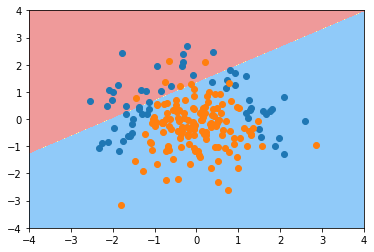

In [8]:
#调用函数
plot_decision_boundary(log_reg,(-4, 4, -4, 4))
#绘制第一类中，X每一列的特征
plt.scatter(X[Y==0,0], X[Y==0, 1])
#绘制第二类中，X每一列的特征
plt.scatter(X[Y==1,0], X[Y==1, 1])
plt.show()

## 采用多项式回归进行逻辑回归

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#定义管道进行操作
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegressionCV())
    ])

## 尝试恰好的多项式参数的数据与图片

In [10]:
poly_log_reg = PolynomialLogisticRegression(2)
poly_log_reg.fit(X_train,Y_train)
poly_log_reg.score(X_train, Y_train)

0.94666666666666666

In [11]:
poly_log_reg.score(X_test, Y_test)

0.90000000000000002

D:\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


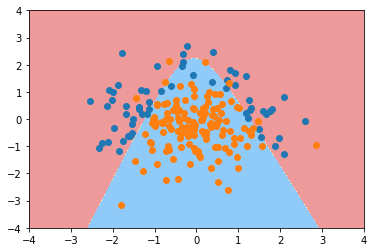

In [12]:
plot_decision_boundary(poly_log_reg, axis=(-4, 4, -4, 4))
plt.scatter(X[Y==0,0], X[Y==0,1])
plt.scatter(X[Y==1,0], X[Y==1,1])
plt.show()

## 尝试过拟合的多项式参数过大情况

In [13]:
poly_log_reg2 = PolynomialLogisticRegression(20)
poly_log_reg2.fit(X_train,Y_train)
poly_log_reg2.score(X_train, Y_train)

0.94666666666666666

In [14]:
poly_log_reg2.score(X_test, Y_test)

0.80000000000000004

D:\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


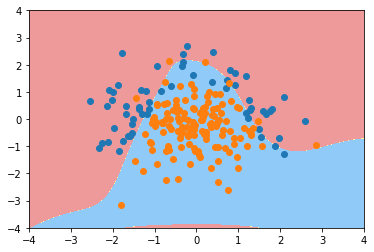

In [15]:
plot_decision_boundary(poly_log_reg2, axis=(-4, 4, -4, 4))
plt.scatter(X[Y==0,0], X[Y==0,1])
plt.scatter(X[Y==1,0], X[Y==1,1])
plt.show()

## 设置损失函数前的较大的C，即Cd()+()

In [21]:
#重定义管道进行操作
def PolynomialLogisticRegression(degree,C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])
poly_log_reg3 = PolynomialLogisticRegression(20,0.1)
poly_log_reg3.fit(X_train,Y_train)
poly_log_reg3.score(X_train, Y_train)

0.92000000000000004

In [22]:
poly_log_reg3.score(X_test, Y_test)

0.73999999999999999

D:\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


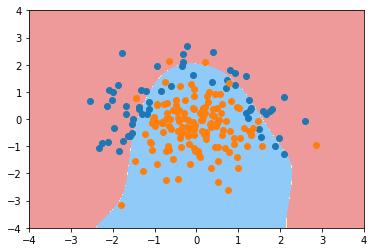

In [23]:
plot_decision_boundary(poly_log_reg3, axis=(-4, 4, -4, 4))
plt.scatter(X[Y==0,0], X[Y==0,1])
plt.scatter(X[Y==1,0], X[Y==1,1])
plt.show()

## 采用L1正则

In [24]:
#重定义管道进行操作
def PolynomialLogisticRegression(degree,C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C,penalty=penalty))
    ])
poly_log_reg4 = PolynomialLogisticRegression(20,0.1,'l1')
poly_log_reg4.fit(X_train,Y_train)
poly_log_reg4.score(X_train, Y_train)

0.93333333333333335

In [25]:
poly_log_reg4.score(X_test, Y_test)

0.80000000000000004

D:\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


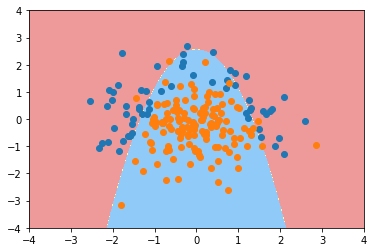

In [26]:
plot_decision_boundary(poly_log_reg4, axis=(-4, 4, -4, 4))
plt.scatter(X[Y==0,0], X[Y==0,1])
plt.scatter(X[Y==1,0], X[Y==1,1])
plt.show()